# Import and install model dependencies

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import random
import math
from tqdm import tqdm
from time import sleep

# Test pretrained model

In [54]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in C:\Users\amars/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-26 torch 1.10.2 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [55]:
img = 'https://www.transportation.gov/sites/dot.gov/files/pictures/shutterstock_168370127.jpg'

In [56]:
#make prediction
results = model(img)
results.print()

image 1/1: 847x1280 33 cars, 1 bus, 5 trucks
Speed: 506.1ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


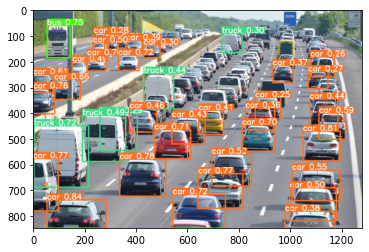

In [57]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [58]:
results.xyxy

[tensor([[5.43117e+01, 7.37876e+02, 2.84357e+02, 8.47000e+02, 8.39262e-01, 2.00000e+00],
         [1.05095e+03, 4.70062e+02, 1.19566e+03, 5.85305e+02, 8.06228e-01, 2.00000e+00],
         [3.36389e+02, 5.79281e+02, 5.16270e+02, 7.23717e+02, 7.81761e-01, 2.00000e+00],
         [8.30273e-01, 5.76157e+02, 9.88974e+01, 7.80105e+02, 7.72718e-01, 2.00000e+00],
         [6.42460e+02, 6.35500e+02, 8.16100e+02, 7.70394e+02, 7.69565e-01, 2.00000e+00],
         [0.00000e+00, 3.05729e+02, 8.43830e+01, 4.03255e+02, 7.59386e-01, 2.00000e+00],
         [5.42263e+01, 5.99454e+01, 1.44782e+02, 1.85525e+02, 7.47718e-01, 5.00000e+00],
         [3.32160e+02, 1.75657e+02, 4.12522e+02, 2.35416e+02, 7.24451e-01, 2.00000e+00],
         [3.73030e+00, 4.49006e+02, 2.16328e+02, 6.88907e+02, 7.20973e-01, 7.00000e+00],
         [5.43719e+02, 7.16426e+02, 7.48796e+02, 8.47000e+02, 7.20357e-01, 2.00000e+00],
         [4.72578e+02, 4.64848e+02, 6.13839e+02, 5.77613e+02, 7.05519e-01, 2.00000e+00],
         [8.13412e+02

# Train model on clear weather dataset

In [59]:
#!cd yolov5 && python train.py --img 1242 --batch 4 --epochs 15 --data clear_weather_dataset.yaml --weights yolov5s.pt --workers 2
#Train using console, better progress bars 

In [60]:
#test sample
clear_model = torch.hub.load('ultralytics/yolov5', 'custom',path="clear_weather_model.pt") 

Using cache found in C:\Users\amars/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-26 torch 1.10.2 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [61]:
img = os.path.join("Data","cadcd","images","val","0000602.png")

In [62]:
results=clear_model(img)
results.print()

image 1/1: 624x1280 3 Cars
Speed: 23.9ms pre-process, 14.0ms inference, 2.0ms NMS per image at shape (1, 3, 320, 640)


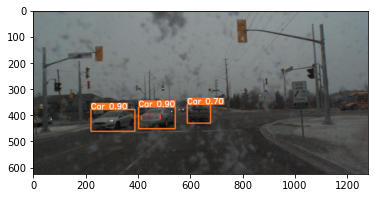

In [63]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

# Create winter data

In [12]:
#get sample image
#000286
#000007
#000016
sample_image_num=["000286","000007","000016"]
sample_imgs=[]
for file_name in sample_image_num:
    sample_imgs.append(cv2.imread(os.path.join("Data","clear_weather","images","val","{}.png".format(file_name))))


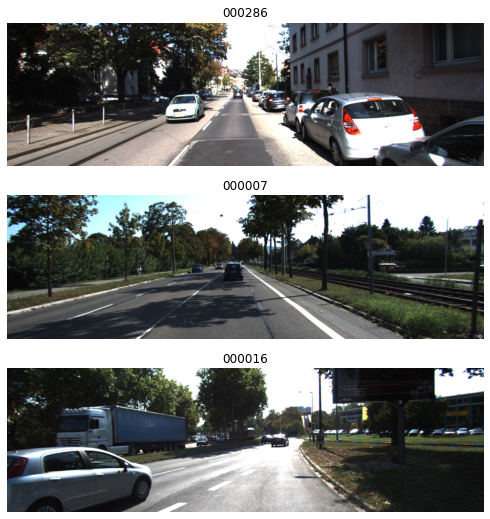

In [13]:
%matplotlib inline
def display_images(imgs,titles=None,RGB=True,figure_size=(15,9),columns = 1):
    
    fig = plt.figure(figsize=figure_size)
  
    # setting values to rows and column variables
    rows = math.ceil(len(imgs)/columns)
    for i in range(len(imgs)):
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, i+1)

        # showing image
        image=imgs[i]
        if not RGB:
            image = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB) 
        plt.imshow(image)
        plt.axis('off')
        if titles is not None:
            plt.title(titles[i])

display_images(sample_imgs,titles=sample_image_num,RGB=False)


In [4]:

import Automold_Road_Augmentation_Library.Automold as am
import Automold_Road_Augmentation_Library.Helpers as hp
import noise

In [14]:
#Main transformer functions
def generate_ice_buildup_layer(shape = (1024,1024),scale = 100.0,octaves = 6, persistence = 0.5,lacunarity = 2.0,threshold=0.0,seed=-1):
    #generate ice clusters using Perlin Noise
    #see paper
    if seed ==-1:
        seed = np.random.randint(0,100)
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale, 
                                        j/scale, 
                                        octaves=octaves, 
                                        persistence=persistence, 
                                        lacunarity=lacunarity, 
                                        repeatx=1024, 
                                        repeaty=1024, 
                                        base=seed)
            
    #add ice color to ice based on noise intencity
    #Colors
    VERY_DARK_ICE=130
    DARK_ICE=150
    MID_ICE=180
    EDGE_ICE=240
    CLEAR=0
    img = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < threshold + -0.05:
                img[i][j] = CLEAR
            elif world[i][j] <  threshold + 0:
                img[i][j] = EDGE_ICE
            elif world[i][j] <  threshold + 0.2:
                img[i][j] =  MID_ICE
            elif world[i][j] <  threshold + 0.35:
                img[i][j] = DARK_ICE
            elif world[i][j] <  threshold + 0.6:
                img[i][j] = VERY_DARK_ICE
    return np.dstack((img,img,img)).astype(np.uint8)


def ice_buildup(img, intensity_threshold=0.14,blur=12,seed=-1):
    #generate the ice layer
    ice_layer = generate_ice_buildup_layer(shape=(img.shape[0],img.shape[1]),threshold=intensity_threshold,seed=seed)
    
    #blend ice layer with image
    ice_image = np.where(ice_layer>0,ice_layer,img)
    #i = cv2.addWeighted(snow_layer,1,img,1,0)
    
    #blur image to simlate loss of focus due to ice
    ice_image = cv2.blur(ice_image,(blur,blur))
    return ice_image

def ice_buildup_fast(img, intensity_threshold=0.14,blur=12):
    #generate the ice layer
    ice_layer = generate_ice_buildup_layer_fast(shape=(img.shape[0],img.shape[1]),threshold=intensity_threshold)
    
    #blend ice layer with image
    ice_image = np.where(ice_layer>0,ice_layer,img)
    #i = cv2.addWeighted(snow_layer,1,img,1,0)
    
    #blur image to simlate loss of focus due to ice
    ice_image = cv2.blur(ice_image,(blur,blur))
    return ice_image

def ice_glass(img,distort_size=5):
    #xxxxxxxxxxxxxxxxxxxxxxx deprecated use fast version xxxxxxxxxxxxxxxxxxxxxxxxx
    ice_img=np.zeros_like(img)
    
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            max_distort=distort_size
            
            #handel edge cases over run
            if img.shape[0]-i<max_distort:
                max_distort=img.shape[0]-i
            if img.shape[1]-j<max_distort:
                max_distort=img.shape[1]-j
                
            #create ice mosaic effect
            rand_offset=np.random.randint(0,max_distort)
            ice_img[i,j,:]=img[i+rand_offset,j+rand_offset,:]
    return ice_img

def ice_glass_fast(img,distort_size=5):
    #same as above function but spead up by using np instead of loops
    ice_img=np.zeros_like(img)
    shape = (img.shape[0], img.shape[1])
    
    #make index
    grid = np.indices(shape)
    ix = grid[0]
    iy = grid[1]
    
    rand_offset=np.random.randint(0,distort_size,size=shape)
    
    #create offset index and clamp to max i
    ix_offset = np.clip(ix + rand_offset,0, shape[0]-1)
    iy_offset = np.clip(iy + rand_offset,0,shape[1]-1)
    
    #create ice mosaic effect
    ice_img[ix,iy,:]=img[ix_offset,iy_offset,:]
    return ice_img
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            max_distort=distort_size
            
            #handel edge cases over run
            if img.shape[0]-i<max_distort:
                max_distort=img.shape[0]-i
            if img.shape[1]-j<max_distort:
                max_distort=img.shape[1]-j
                
            #create ice mosaic effect
            rand_offset=np.random.randint(0,max_distort)
            ice_img[i,j,:]=img[i+rand_offset,j+rand_offset,:]
    return ice_img


def adjust_brightness(image,brightness_coefficient = 0.7):
    image_HLS = am.hls(image) ## Conversion to HLS
    image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient ## scale pixel values down for channel 1(Lightness)
    image_RGB= am.rGb(image_HLS,'hls')
    return image_RGB

def vertcal_motion_blur(img, kernel_size=7):
    # Create the vertical kernel.
    kernel_v = np.zeros((kernel_size, kernel_size))

    # Fill the middle row with ones.
    kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
    # Normalize.
    kernel_v /= kernel_size
    
    # Apply the vertical kernel.
    vertical_mb = cv2.filter2D(img, -1, kernel_v)
    return vertical_mb

def horizontal_motion_blur(img, kernel_size=7):
    # Create the kernel.
    kernel_h = np.zeros((kernel_size, kernel_size))

    # Fill the middle row with ones.
    kernel_h[int((kernel_size - 1)/2),:] = np.ones(kernel_size)
    # Normalize.
    kernel_h /= kernel_size
    
    # Apply the vertical kernel.
    horizontal_mb = cv2.filter2D(img, -1, kernel_h)
    return horizontal_mb


def generate_random_lines(imshape,slant, line_length=60):
    lines=[]
    area=imshape[0]*imshape[1]
    no_of_lines=area//1500
    

    for i in range(no_of_lines):
        if slant<0:
            x= np.random.randint(slant,imshape[1])
        else:
            x= np.random.randint(0,imshape[1]-slant)
        y = np.random.randint(0,imshape[0]-line_length)
        lines.append((x,y))
    return lines,line_length

def add_streaking_snow(img,slant,streak_width=(1,2),streak_color=(250,250,250),ground_snow=True):
    #creates fluffy snow using random lines
    #img= am.add_snow(img,0.5)

    #generate snow streaks
    snow_streaks,streak_length = generate_random_lines(img.shape,slant)
    
    #create a snow layer whith the snow streaks
    snow_layer = np.zeros(img.shape,np.uint8)
    
    for  streak in snow_streaks:
        end=(streak[0]+2+slant,streak[1]+2+streak_length)
        
        if type(streak_width):
            width = random.randint(streak_width[0],streak_width[1])
        else:
            width=streak_width
        cv2.line(snow_layer,streak,end,streak_color,width)
        #cv2.line(snow_layer_mask,(streak[0]+2,streak[1]+2),end,streak_color,streak_width+1)
        
        
    #add stow to the  ground using Automold function
    if ground_snow:
        img=am.rgb(img)
        img=am.add_snow(img,0.7)

        img=am.bgr(img)
    
    #blend snow streak layer to image
    alpha = snow_layer/255
    snow_image = (snow_layer*alpha+img*(1-alpha)).astype(np.uint8)
    
    #add bit of blur to reduce visablity 
    snow_image=cv2.blur(snow_image,(4,4))
    
    return snow_image


def add_fluffy_snow(img,size_range,flakes_per_pixel=0.005,color=(250,250,250),ground_snow=False):
    #creates fluffy snow using random shapes 

    snow_layer = np.zeros(img.shape,np.uint8)
    
    area=img.shape[0]*img.shape[1]
    number_of_flakes=int(area*flakes_per_pixel)
    
    #add round and rectangle
    for flake_num in range(number_of_flakes):
        
        #generate commen parameters
        flake_size=random.randint(size_range[0],size_range[1])
        x = random.randint(flake_size,img.shape[1]-flake_size)
        y = random.randint(flake_size,img.shape[0]-flake_size)
        rot_angle=random.randint(0,180)
        
        #generate round or rectangle flake
        shape=random.choice(["round","rectangle"])
        
        if shape=="round":
            minor_axes=random.randint(2,flake_size)
            cv2.ellipse(snow_layer,(x,y),(flake_size,minor_axes),rot_angle,0,360,color=color,thickness=-1)
        elif shape=="rectangle":
            size2=random.randint(size_range[0],size_range[1])
            cv2.rectangle(snow_layer,(x,y),(x+flake_size,y+size2),color=color,thickness=-1)
    snow_layer=cv2.blur(snow_layer,(9,9))
    snow_layer=vertcal_motion_blur(snow_layer,9) 
    
    #add stow to the  ground using Automold function
    if ground_snow:
        img=am.rgb(img)
        img=am.add_snow(img,0.3)
        img=am.bgr(img)
    
    #blend snow streak layer to image
    snow_image = cv2.addWeighted(snow_layer,1,img,1,0)
    return snow_image

def add_snow_noise(img,scale_percent = 300, flakes_amount_threshold=0.4, motion_blur_amount=7,ground_snow=False,blur_type='v'):
    
    #create noise the imitate fine snow
    area=img.shape[0]*img.shape[1]
    noise = np.random.choice([0, 255], size=area, p=[1-flakes_amount_threshold, flakes_amount_threshold])
    noise=np.reshape(noise,(img.shape[0],img.shape[1])).astype('float32')
    

    snow_layer = np.dstack((noise,noise,noise))
    # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image to change size of snow flakes
    snow_layer = cv2.resize(snow_layer, dim, interpolation = cv2.INTER_AREA)
    snow_layer=snow_layer[0:img.shape[0],0:img.shape[1]]
    snow_layer=snow_layer.astype(np.uint8)
    
    #add motion blur
    if blur_type=='v':
        snow_layer=vertcal_motion_blur(snow_layer,motion_blur_amount)
    elif blur_type=='h':
        snow_layer=horizontal_motion_blur(snow_layer,motion_blur_amount)
    elif blur_type=="vb":
        snow_layer=vertcal_motion_blur(snow_layer,motion_blur_amount)
        snow_layer=horizontal_motion_blur(snow_layer,motion_blur_amount)
        
    
    #add stow to the  ground using Automold function
    if ground_snow:
        img=am.rgb(img)
        img=am.add_snow(img,0.3)
        img=am.bgr(img)
    
    #blend snow with images
    snow_image = cv2.addWeighted(snow_layer,1,img,1,0)
    return snow_image



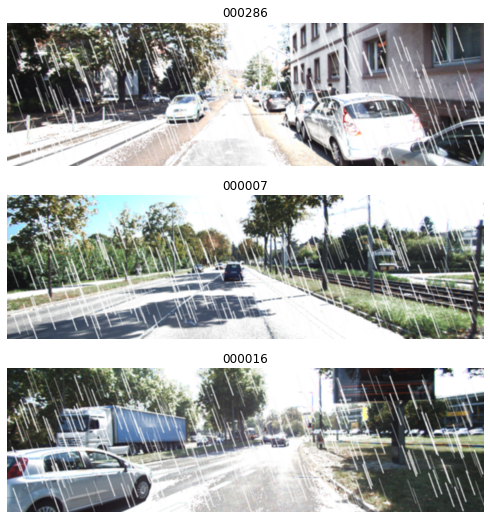

In [27]:
#test streaking snow
new_imgs = []
for img in sample_imgs:
    new_img = add_streaking_snow(img,20)
    
    new_imgs.append(new_img)
    
    
display_images(new_imgs,sample_image_num,RGB=False)

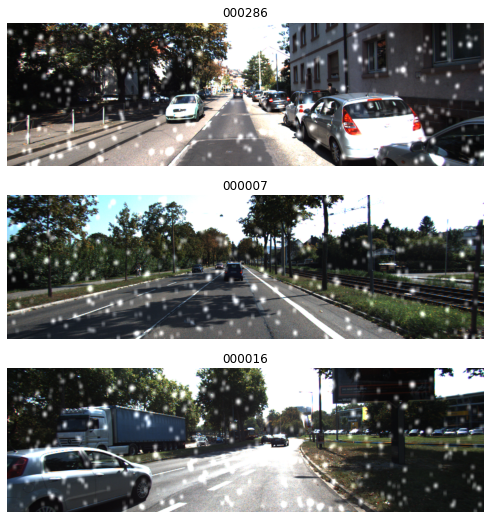

In [28]:
#test fluffy snow
new_imgs = []
for img in sample_imgs:
    new_img = add_fluffy_snow(img,(2,7),flakes_per_pixel=0.0008,ground_snow=False)
    new_imgs.append(new_img)
display_images(new_imgs,sample_image_num,RGB=False)

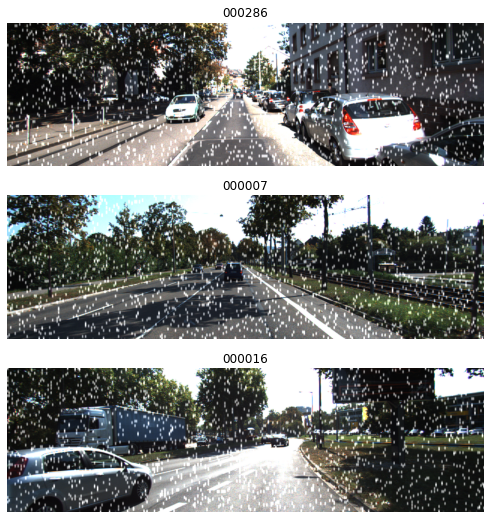

In [29]:
#test photoshop snow
#medium fine snow scale_percent=300,flakes_amount_threshold=0.1,motion_blur_amount=7
new_imgs = []
for img in sample_imgs:
    new_img = add_snow_noise(img,scale_percent=390,flakes_amount_threshold=0.06,motion_blur_amount=7,blur_type='v')
    new_imgs.append(new_img)
display_images(new_imgs,sample_image_num,RGB=False)

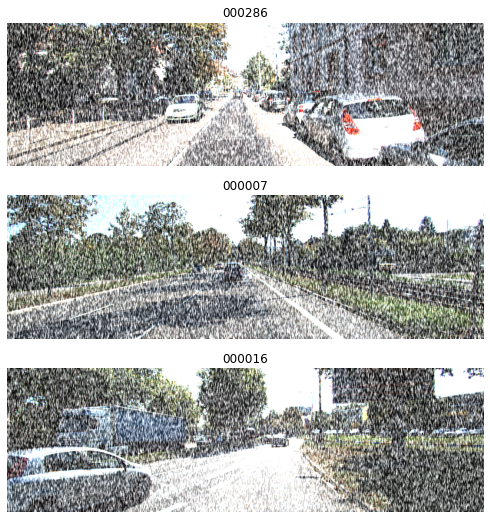

In [30]:
#test photoshop snow
#heavy fine snow scale_percent=300,flakes_amount_threshold=0.1,motion_blur_amount=7
new_imgs = []
for img in sample_imgs:
    new_img = add_snow_noise(img,scale_percent=200,flakes_amount_threshold=0.3,motion_blur_amount=7,ground_snow=False)
    new_imgs.append(new_img)
display_images(new_imgs,sample_image_num,RGB=False)

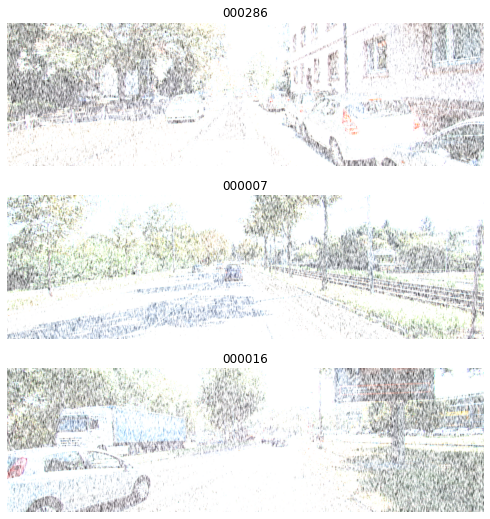

In [31]:
#test photoshop snow
#white out
new_imgs = []
for img in sample_imgs:
    new_img = add_snow_noise(img,scale_percent=130,flakes_amount_threshold=0.6,motion_blur_amount=7,ground_snow=True)
    new_imgs.append(new_img)
display_images(new_imgs,sample_image_num,RGB=False)

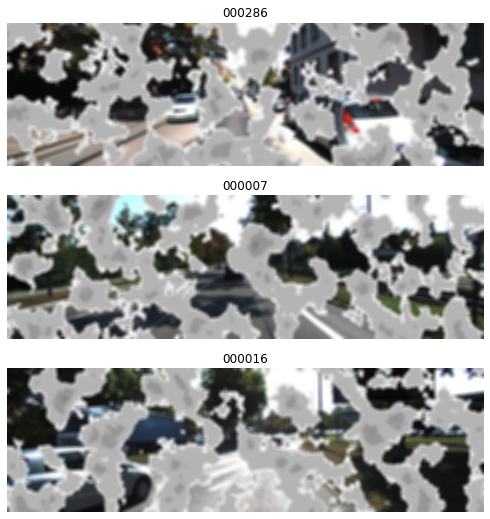

In [32]:
#test ice clumps 
new_imgs = []
for img in sample_imgs:
    new_img = ice_buildup(img,intensity_threshold=0.05)
    new_imgs.append(new_img)
display_images(new_imgs,sample_image_num,RGB=False)

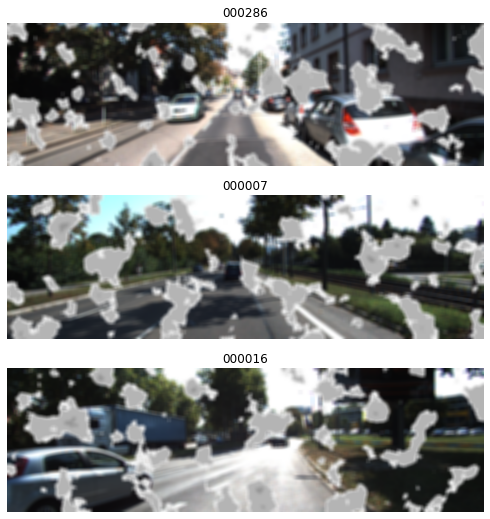

In [33]:
#light build up
new_imgs = []
for img in sample_imgs:
    new_img = ice_buildup(img,intensity_threshold=0.17)
    new_imgs.append(new_img)
display_images(new_imgs,sample_image_num,RGB=False)

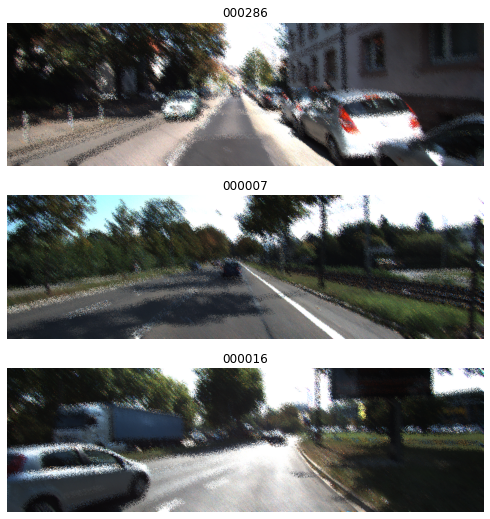

In [34]:
#test clear ice wind shield 
new_imgs = []
for img in sample_imgs:
    new_img = ice_glass(img,14)
    
    new_imgs.append(new_img)
    
    
display_images(new_imgs,sample_image_num,RGB=False)

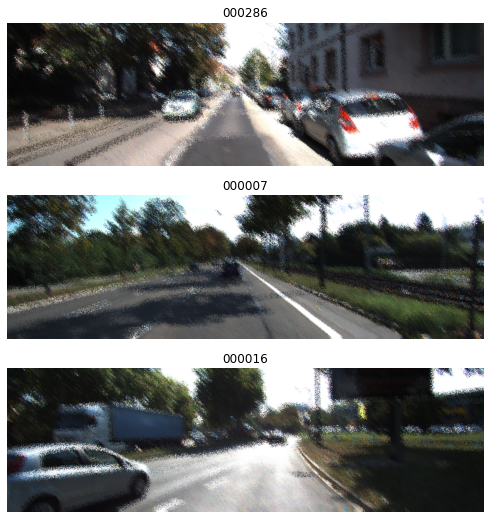

In [35]:
#test clear ice wind shield 
new_imgs = []
for img in sample_imgs:
    new_img = ice_glass_fast(img,14)
    
    new_imgs.append(new_img)
    
    
display_images(new_imgs,sample_image_num,RGB=False)

## Generate the winter data

In [21]:
# winter data types
CLEAR_ICE = "ice_buildup_clear" #IC
ICE_BUILDUP_LIGHT = "ice_buildup_light" #IBL
ICE_BUILDUP_HEAVY = "ice_buildup_heavy" #IBH
WHITE_OUT_SNOW = "white_out_snow" #WOS
FINE_SNOW_HEAVY = "fine_snow_heavy" #FSH
FINE_SNOW_MED = "fine_snow_med" #FSM
FLUFFY_SNOW = "fluffy_snow" #FLS
STREAK_SNOW = "streaking_snow" #SS

ALL_CONDITIONS = [CLEAR_ICE,ICE_BUILDUP_HEAVY,ICE_BUILDUP_LIGHT, WHITE_OUT_SNOW, FINE_SNOW_HEAVY, FINE_SNOW_MED, 
                  FLUFFY_SNOW, STREAK_SNOW]

In [37]:
import os
#make folders
def make_auto_snow_dir(condition_name, root_data_dir="Data",printit=True):
    mode = 0o666
    #make parent folder
    data_root_path = os.path.join(root_data_dir, "AutoSnow_"+condition_name)
    if not os.path.exists(data_root_path):
        os.mkdir(data_root_path, mode)
    
    if printit:
        print("Directory '{}' created".format(data_root_path))
    
    #make images subdirctory
    path_images = os.path.join(root_data_dir, "AutoSnow_"+condition_name,'images')
    if not os.path.exists(path_images):
        os.mkdir(path_images, mode)
    
    if printit:
        print("Directory '{}' created".format(path_images))
    
    #make lable directory
    path_labels = os.path.join(root_data_dir, "AutoSnow_"+condition_name,'prediction_labels')
    if not os.path.exists(path_labels):
        os.mkdir(path_labels, mode)
    if printit:
        print("Directory '{}' created".format(path_labels))
    
    return data_root_path, path_images, path_labels
make_auto_snow_dir(STREAK_SNOW)

Directory 'Data\AutoSnow_streaking_snow' created
Directory 'Data\AutoSnow_streaking_snow\images' created
Directory 'Data\AutoSnow_streaking_snow\prediction_labels' created


('Data\\AutoSnow_streaking_snow',
 'Data\\AutoSnow_streaking_snow\\images',
 'Data\\AutoSnow_streaking_snow\\prediction_labels')

In [38]:
#get file names of original images

def get_original_image_list(image_dir="Data/clear_weather/images/val"):
    original_image_paths=[]
    for dir_path, sub_dirs, files in os.walk(image_dir):
        for file_name in files:
            if file_name.endswith(".png"):
                img_path = os.path.join(image_dir, file_name)
                original_image_paths.append(img_path)
                #print(img_path)
    
    return original_image_paths



In [39]:


original_image_paths=get_original_image_list()
#make all weather condition
for weather in ALL_CONDITIONS:
    #make directory
    root_weather_dir, img_dir, _ = make_auto_snow_dir(weather,printit=False)
    
    #appply weather to each image
    
    for org_image_path in tqdm(original_image_paths,"Creating {} data...".format(weather)):
        #create path name for new image
        #print(org_image_path)
        base_name =os.path.basename(os.path.normpath(org_image_path))
        new_img_path=os.path.join(img_dir,base_name)
        #print("New: ",new_img_path)
        
        
        #If image already exits delete it before regenerating it
        if os.path.exists(new_img_path):
            os.remove(new_img_path)
        
        img=cv2.imread(org_image_path)
        #generate images using current images
        if weather == CLEAR_ICE:
            new_img = ice_glass_fast(img,14)
        elif weather == ICE_BUILDUP_HEAVY:
            new_img = ice_buildup(img,intensity_threshold=0.05)
                
        elif weather == ICE_BUILDUP_LIGHT:
            new_img = ice_buildup(img,intensity_threshold=0.17)
        elif weather == WHITE_OUT_SNOW:
            new_img = add_snow_noise(img,scale_percent=130,flakes_amount_threshold=0.6,motion_blur_amount=7,ground_snow=True)  
        elif weather == FINE_SNOW_HEAVY:
            new_img = add_snow_noise(img,scale_percent=200,flakes_amount_threshold=0.3,motion_blur_amount=7,ground_snow=False)
        elif weather == FINE_SNOW_MED:
            new_img = add_snow_noise(img,scale_percent=300,flakes_amount_threshold=0.06,motion_blur_amount=7,blur_type='v')
        elif weather == FLUFFY_SNOW:
            new_img = add_fluffy_snow(img,(2,7),flakes_per_pixel=0.0008,ground_snow=False)
        elif weather == STREAK_SNOW:
            slant = np.random.randint(5,45)
            new_img = add_streaking_snow(img,slant)
        else:
            new_img=[]
            print("Weather condition not identified. Something went wrong ;(")
        
        cv2.imwrite(new_img_path, new_img)
        

Creating streaking_snow data...: 100%|█████████| 11/11 [00:00<00:00, 15.91it/s]


In [40]:
original_image_paths=get_original_image_list()
#make directory with all mixed conditions
root_weather_dir, img_dir, _ = make_auto_snow_dir("mixed",printit=False)
def create_mixed_dataset(img_dir,original_image_paths,prefix=""): 
    #apply weather to each image
    for org_image_path in tqdm(original_image_paths,"Creating {} data...".format("mixed")):

        #pick weather condition at random
        weather = random.choice(ALL_CONDITIONS)

        #create path name for new image
        #print(org_image_path)
        base_name =os.path.basename(os.path.normpath(org_image_path))
        if prefix == "":
            new_img_path=os.path.join(img_dir,base_name)
        else:
            new_img_path=os.path.join(img_dir,prefix+base_name)
        #print("New: ",new_img_path)


        #If image already exits delete it before regenerating it
        if os.path.exists(new_img_path):
            os.remove(new_img_path)

        img=cv2.imread(org_image_path)
        #generate images using current images
        if weather == CLEAR_ICE:
            new_img = ice_glass_fast(img,14)
        elif weather == ICE_BUILDUP_HEAVY:
            new_img = ice_buildup(img,intensity_threshold=0.05)

        elif weather == ICE_BUILDUP_LIGHT:
            new_img = ice_buildup(img,intensity_threshold=0.17)
        elif weather == WHITE_OUT_SNOW:
            new_img = add_snow_noise(img,scale_percent=130,flakes_amount_threshold=0.6,motion_blur_amount=7,ground_snow=True)  
        elif weather == FINE_SNOW_HEAVY:
            new_img = add_snow_noise(img,scale_percent=200,flakes_amount_threshold=0.3,motion_blur_amount=7,ground_snow=False)
        elif weather == FINE_SNOW_MED:
            new_img = add_snow_noise(img,scale_percent=300,flakes_amount_threshold=0.06,motion_blur_amount=7,blur_type='v')
        elif weather == FLUFFY_SNOW:
            new_img = add_fluffy_snow(img,(2,7),flakes_per_pixel=0.0008,ground_snow=False)
        elif weather == STREAK_SNOW:
            slant = np.random.randint(5,45)
            new_img = add_streaking_snow(img,slant)
        else:
            new_img=[]
            print("Weather condition not identified. Something went wrong ;(")

        cv2.imwrite(new_img_path, new_img)
        


In [41]:
create_mixed_dataset( img_dir,original_image_paths,prefix="")

Creating mixed data...: 100%|██████████████████| 11/11 [00:01<00:00,  6.33it/s]


# Create winter training data

In [42]:
#create mixed winter weather training data
original_image_paths=get_original_image_list("Data/clear_weather/images/train")

img_dir = 'Data/AutoSnow_training_data_mixed/images/train'
create_mixed_dataset(img_dir,original_image_paths,prefix="AS_train")

Creating mixed data...: 100%|██████████████████| 11/11 [00:04<00:00,  2.32it/s]


In [43]:
#create mixed winter weather training data valuation set
original_image_paths=get_original_image_list("Data/clear_weather/images/val")

img_dir = 'Data/AutoSnow_training_data_mixed/images/val'
create_mixed_dataset(img_dir,original_image_paths,prefix="AS_train")

Creating mixed data...: 100%|██████████████████| 11/11 [00:01<00:00,  7.00it/s]


In [44]:
import shutil
def copy_label_file(label_dir, prefix="AS_train"):
    #duplicate label files in the same folder and adds prefix to map to winter images
    original_image_paths=[]
    for dir_path, sub_dirs, files in os.walk(label_dir):
        for file_name in files:
            if file_name.endswith(".txt"):
                label_path_old = os.path.join(label_dir, file_name)
                label_path_new = os.path.join(label_dir, prefix+file_name)
                
                shutil.copyfile(label_path_old, label_path_new)

                
                


In [45]:
#duplicate label files for val dataset
copy_label_file("Data/AutoSnow_training_data_mixed/labels/val")

In [46]:
#duplicate label files for train dataset
copy_label_file("Data/AutoSnow_training_data_mixed/labels/train")

# Creating sample image figures and presentation assets

In [19]:
# Creating sample image figure with each effect for paper and slides

figure_images=[]


org_sample_image=sample_imgs[0] 
figure_images.append(org_sample_image)

#generate images for each effect using current sample image
new_img = ice_glass_fast(org_sample_image,14)
figure_images.append(new_img)

new_img = ice_buildup(org_sample_image,intensity_threshold=0.05)
figure_images.append(new_img)

new_img = ice_buildup(org_sample_image,intensity_threshold=0.17)
figure_images.append(new_img)

new_img = add_snow_noise(org_sample_image,scale_percent=130,flakes_amount_threshold=0.6,motion_blur_amount=7,ground_snow=True)  
figure_images.append(new_img)

new_img = add_snow_noise(org_sample_image,scale_percent=200,flakes_amount_threshold=0.3,motion_blur_amount=7,ground_snow=False)
figure_images.append(new_img)

new_img = add_snow_noise(org_sample_image,scale_percent=300,flakes_amount_threshold=0.06,motion_blur_amount=7,blur_type='v')
figure_images.append(new_img)

new_img = add_fluffy_snow(org_sample_image,(2,7),flakes_per_pixel=0.0008,ground_snow=False)
figure_images.append(new_img)

slant = np.random.randint(5,45)
new_img = add_streaking_snow(org_sample_image,slant)
figure_images.append(new_img)


In [22]:
from string import ascii_lowercase
#create sub fugure titles
FIGURE_NUM="1"
figure_sub_titles = []
letter_i = 0 

for effect_str in ["Original image"] + ALL_CONDITIONS:
    prefix = "Figure " + FIGURE_NUM+ascii_lowercase[letter_i]+": "
    
    name = "Original image"
    if effect_str is not "Original image":
        name = "Image with AutoSnow effect: "+ effect_str
    figure_sub_titles.append(prefix+name)
    letter_i+=1
figure_sub_titles

<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-22-4b39b24d642f>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if effect_str is not "Original image":


['Figure 1a: Original image',
 'Figure 1b: Image with AutoSnow effect: ice_buildup_clear',
 'Figure 1c: Image with AutoSnow effect: ice_buildup_heavy',
 'Figure 1d: Image with AutoSnow effect: ice_buildup_light',
 'Figure 1e: Image with AutoSnow effect: white_out_snow',
 'Figure 1f: Image with AutoSnow effect: fine_snow_heavy',
 'Figure 1g: Image with AutoSnow effect: fine_snow_med',
 'Figure 1h: Image with AutoSnow effect: fluffy_snow',
 'Figure 1i: Image with AutoSnow effect: streaking_snow']

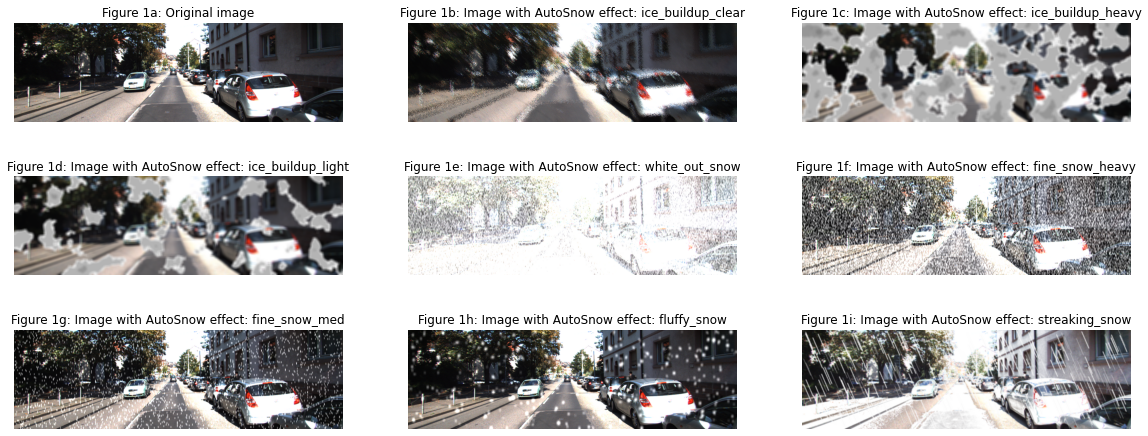

In [27]:
display_images(figure_images,figure_sub_titles,False,(20,8),3)

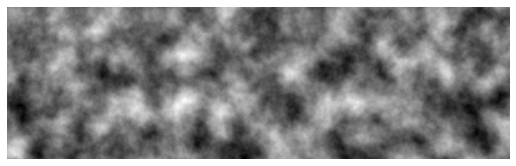

In [50]:
#Make smaple figure of Perlin noise
shape=(org_sample_image.shape[0],org_sample_image.shape[1])
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
threshold=0.0
#generate Perlin Noise
#see paper
seed = np.random.randint(0,100)
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)
        
        
fig = plt.figure(figsize=(9,9))
fig.add_subplot(1, 1, 1)

# showing image
plt.imshow(world,cmap='gray')
plt.axis('off')
#plt.title("Perlin Noise")
plt.show()


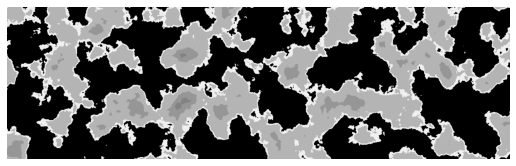

In [51]:
ice_layer=generate_ice_buildup_layer(shape = shape,scale = 100.0,octaves = 6, persistence = 0.5,lacunarity = 2.0,threshold=0.05,seed=seed)
display_images([ice_layer],None,False,(9,9))

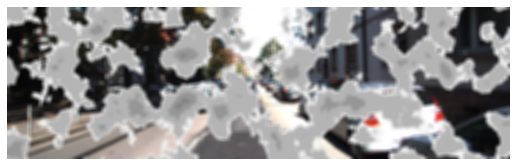

In [52]:
new_img = ice_buildup(org_sample_image,intensity_threshold=0.05,seed=seed)
display_images([new_img],None,False,(9,9))

In [6]:
for cond in ALL_CONDITIONS:
    print(cond.replace("_"," "),end=", ")

ice buildup clear, ice buildup heavy, ice buildup light, white out snow, fine snow heavy, fine snow med, fluffy snow, streaking snow, 